# Online Deterministic Annealing (ODA) for Custering

> A general-purpose learning model designed to meet the needs of applications in which computational resources are limited, and robustness and interpretability are prioritized.

> Constitutes an **online** prototype-based learning algorithm based on annealing optimization that is formulated as an recursive **gradient-free** stochastic approximation algorithm.

> Can be viewed as an interpretable and progressively growing competitive-learning neural network model.

> Christos Mavridis (<mavridis@umd.edu>)

In [1]:
%matplotlib inline
from IPython.display import HTML

# Toggle on/off the raw code
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off the raw code."></form>''')

## Import Modules

In [2]:
import pickle
import numpy as np

import os 
import sys 
cwd = os.path.abspath('.')
sys.path.append(cwd)
odawd = os.path.abspath('./../../')
sys.path.append(odawd)
testswd = os.path.abspath('./../')
sys.path.append(testswd)

from OnlineDeterministicAnnealing.oda import ODA
from data import domain_plots

# For Plotting Figures horizontally
import matplotlib.pyplot as plt
import io
import base64
class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 10px;
        border: 3px solid #888888;  
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))

print('*** ODA Class Imported ***')

*** ODA Class Imported ***


## Load Data

train_data_x: [[array([0.70373002, 0.291594  ])], ..., [array([0.80671487, 0.61023186])]]
train_data_y: [[0], ..., [0]]
train_labels: [0, ..., 0]



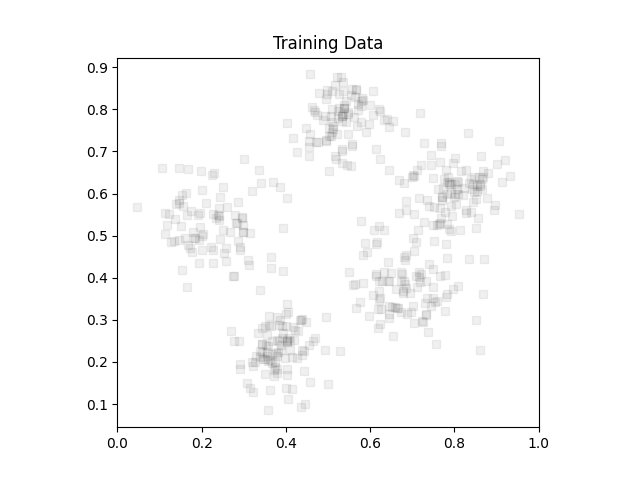
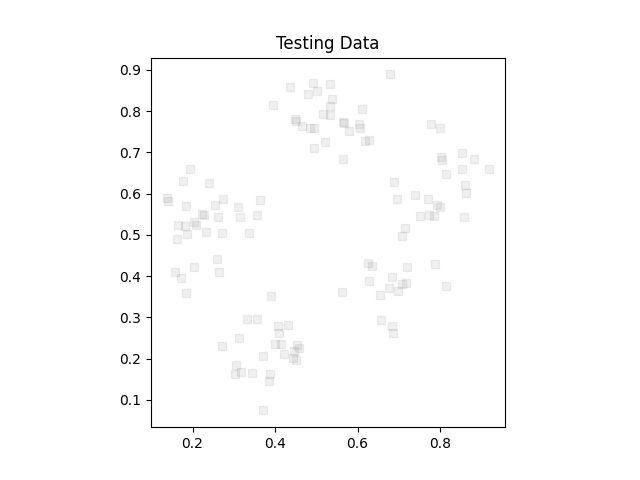

In [3]:
data_file = testswd+'/data/data.pkl'

with open(data_file, mode='rb') as file:
    train_data,train_labels,test_data,test_labels = pickle.load(file)

# Training Data
train_data_x = [[td[1]] for td in train_data]
train_data_y = [np.atleast_1d(0) for td in train_data_x]
train_labels = [0 for i in range(len(train_labels))] 

# Testing Data
test_data_x = [[td[1]] for td in test_data]
test_data_y = [np.atleast_1d(0) for td in test_data_x]
test_labels = [0 for i in range(len(test_labels))] 
    
print(f'train_data_x: [{train_data_x[0]}, ..., {train_data_x[-1]}]')
print(f'train_data_y: [{train_data_y[0]}, ..., {train_data_y[-1]}]')
print(f'train_labels: [{train_labels[0]}, ..., {train_labels[-1]}]')

oPlot = FlowLayout()
ax = domain_plots.show_data(train_data,train_labels,plot_fig=False,save_fig = False, title='Training Data')
oPlot.add_plot(ax)
ax = domain_plots.show_data(test_data,test_labels,plot_fig=False,save_fig = False, title='Testing Data')
oPlot.add_plot(ax)
oPlot.PassHtmlToCell()

## Termination Criteria

In [4]:
# Minimum Termperature 
Tmin = [1e-4]
# Limit in node's children. After that stop growing
Kmax = [50]
# Desired training error
error_threshold = [0.0]

## Load or Initialize Model

*** ODA Model Initialized ***



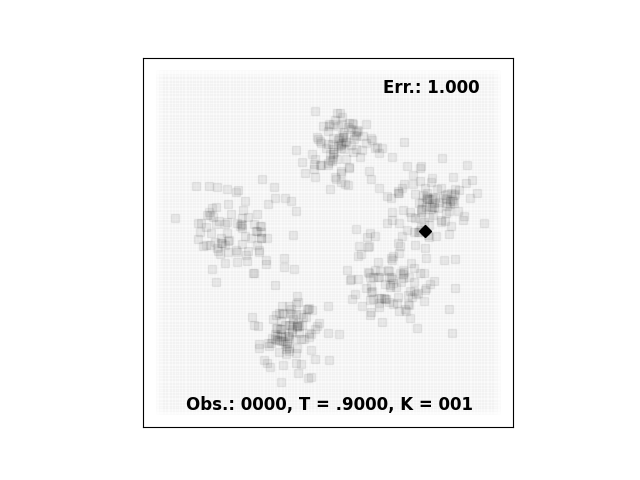

(Ignore error text in the top right corner. It is just not quantified during initialization.)


In [5]:
load_file = ''

# Load Existing ODA Model
if len(load_file)>0:

    with open(load_file+'.pkl', mode='rb') as file:
        clf = pickle.load(file)

    clf.load()

# Initialize ODA    
else:
    
    # Initialize with a random point from the dataset given
    clf = ODA(train_data_x=train_data_x, train_data_y=train_data_y, train_labels=train_labels,
              Tmin=Tmin,Kmax=Kmax,error_threshold = error_threshold)
    
    # It is possible to initialize with no data point. Will be initialized with the first data point it observes.
    # clf = ODA(Tmin=Tmin,Kmax=Kmax,error_threshold = error_threshold)

print('*** ODA Model Initialized ***')
oPlot = FlowLayout()
ax = domain_plots.show_instance(train_data=train_data,train_labels=train_labels, 
                                clf=clf, instance=0, res=[1],
                                plot_fig=False,save_fig = False)
oPlot.add_plot(ax)
oPlot.PassHtmlToCell()
print('(Ignore error text in the top right corner. It is just not quantified during initialization.)')

## Fit Model

In [6]:
print('*** ODA ***')

clf.fit(train_data_x=train_data_x,train_data_y=train_data_y,train_labels=train_labels,
        test_data_x=test_data_x,test_data_y=test_data_y,test_labels=test_labels)

print('*** ODA ***')
errorTrain = clf.score(train_data_x,train_data_y,train_labels)
errorTest = clf.score(test_data_x,test_data_y,test_labels)
print(f'Training Errors: Av. Distortion: {errorTrain[0]}, Regression error: {errorTrain[1]}, Classification Acc.: {errorTrain[2]}') 
print(f'Testing Errors: Av. Distortion: {errorTest[0]}, Regression error: {errorTest[1]}, Classification Acc.: {errorTest[2]}') 
print(f'Running time: {clf.myTime[-1]-clf.myTime[1]:.1f}s')

*** ODA ***
2 -- ID: [0]: Samples: 6(+6): T = 0.9000, K = 1, treeK = 1, t = 0.8 [+0.8s]
Train Error: [0.0990, 0.0000, 0.0000]
Test Error: [0.1120, 0.0000, 0.0000]
3 -- ID: [0]: Samples: 40(+34): T = 0.0900, K = 1, treeK = 1, t = 1.1 [+0.3s]
Train Error: [0.0847, 0.0000, 0.0000]
Test Error: [0.0930, 0.0000, 0.0000]
4 -- ID: [0]: Samples: 85(+45): T = 0.0450, K = 1, treeK = 1, t = 1.1 [+0.0s]
Train Error: [0.0904, 0.0000, 0.0000]
Test Error: [0.0919, 0.0000, 0.0000]
5 -- ID: [0]: Samples: 133(+48): T = 0.0360, K = 2, treeK = 2, t = 1.1 [+0.0s]
Train Error: [0.0428, 0.0000, 0.0000]
Test Error: [0.0451, 0.0000, 0.0000]
6 -- ID: [0]: Samples: 212(+79): T = 0.0288, K = 3, treeK = 3, t = 1.1 [+0.0s]
Train Error: [0.0395, 0.0000, 0.0000]
Test Error: [0.0333, 0.0000, 0.0000]
7 -- ID: [0]: Samples: 251(+39): T = 0.0230, K = 4, treeK = 4, t = 1.1 [+0.0s]
Train Error: [0.0188, 0.0000, 0.0000]
Test Error: [0.0182, 0.0000, 0.0000]
8 -- ID: [0]: Samples: 328(+77): T = 0.0184, K = 4, treeK = 4, t = 1.

## Plot Training Curve


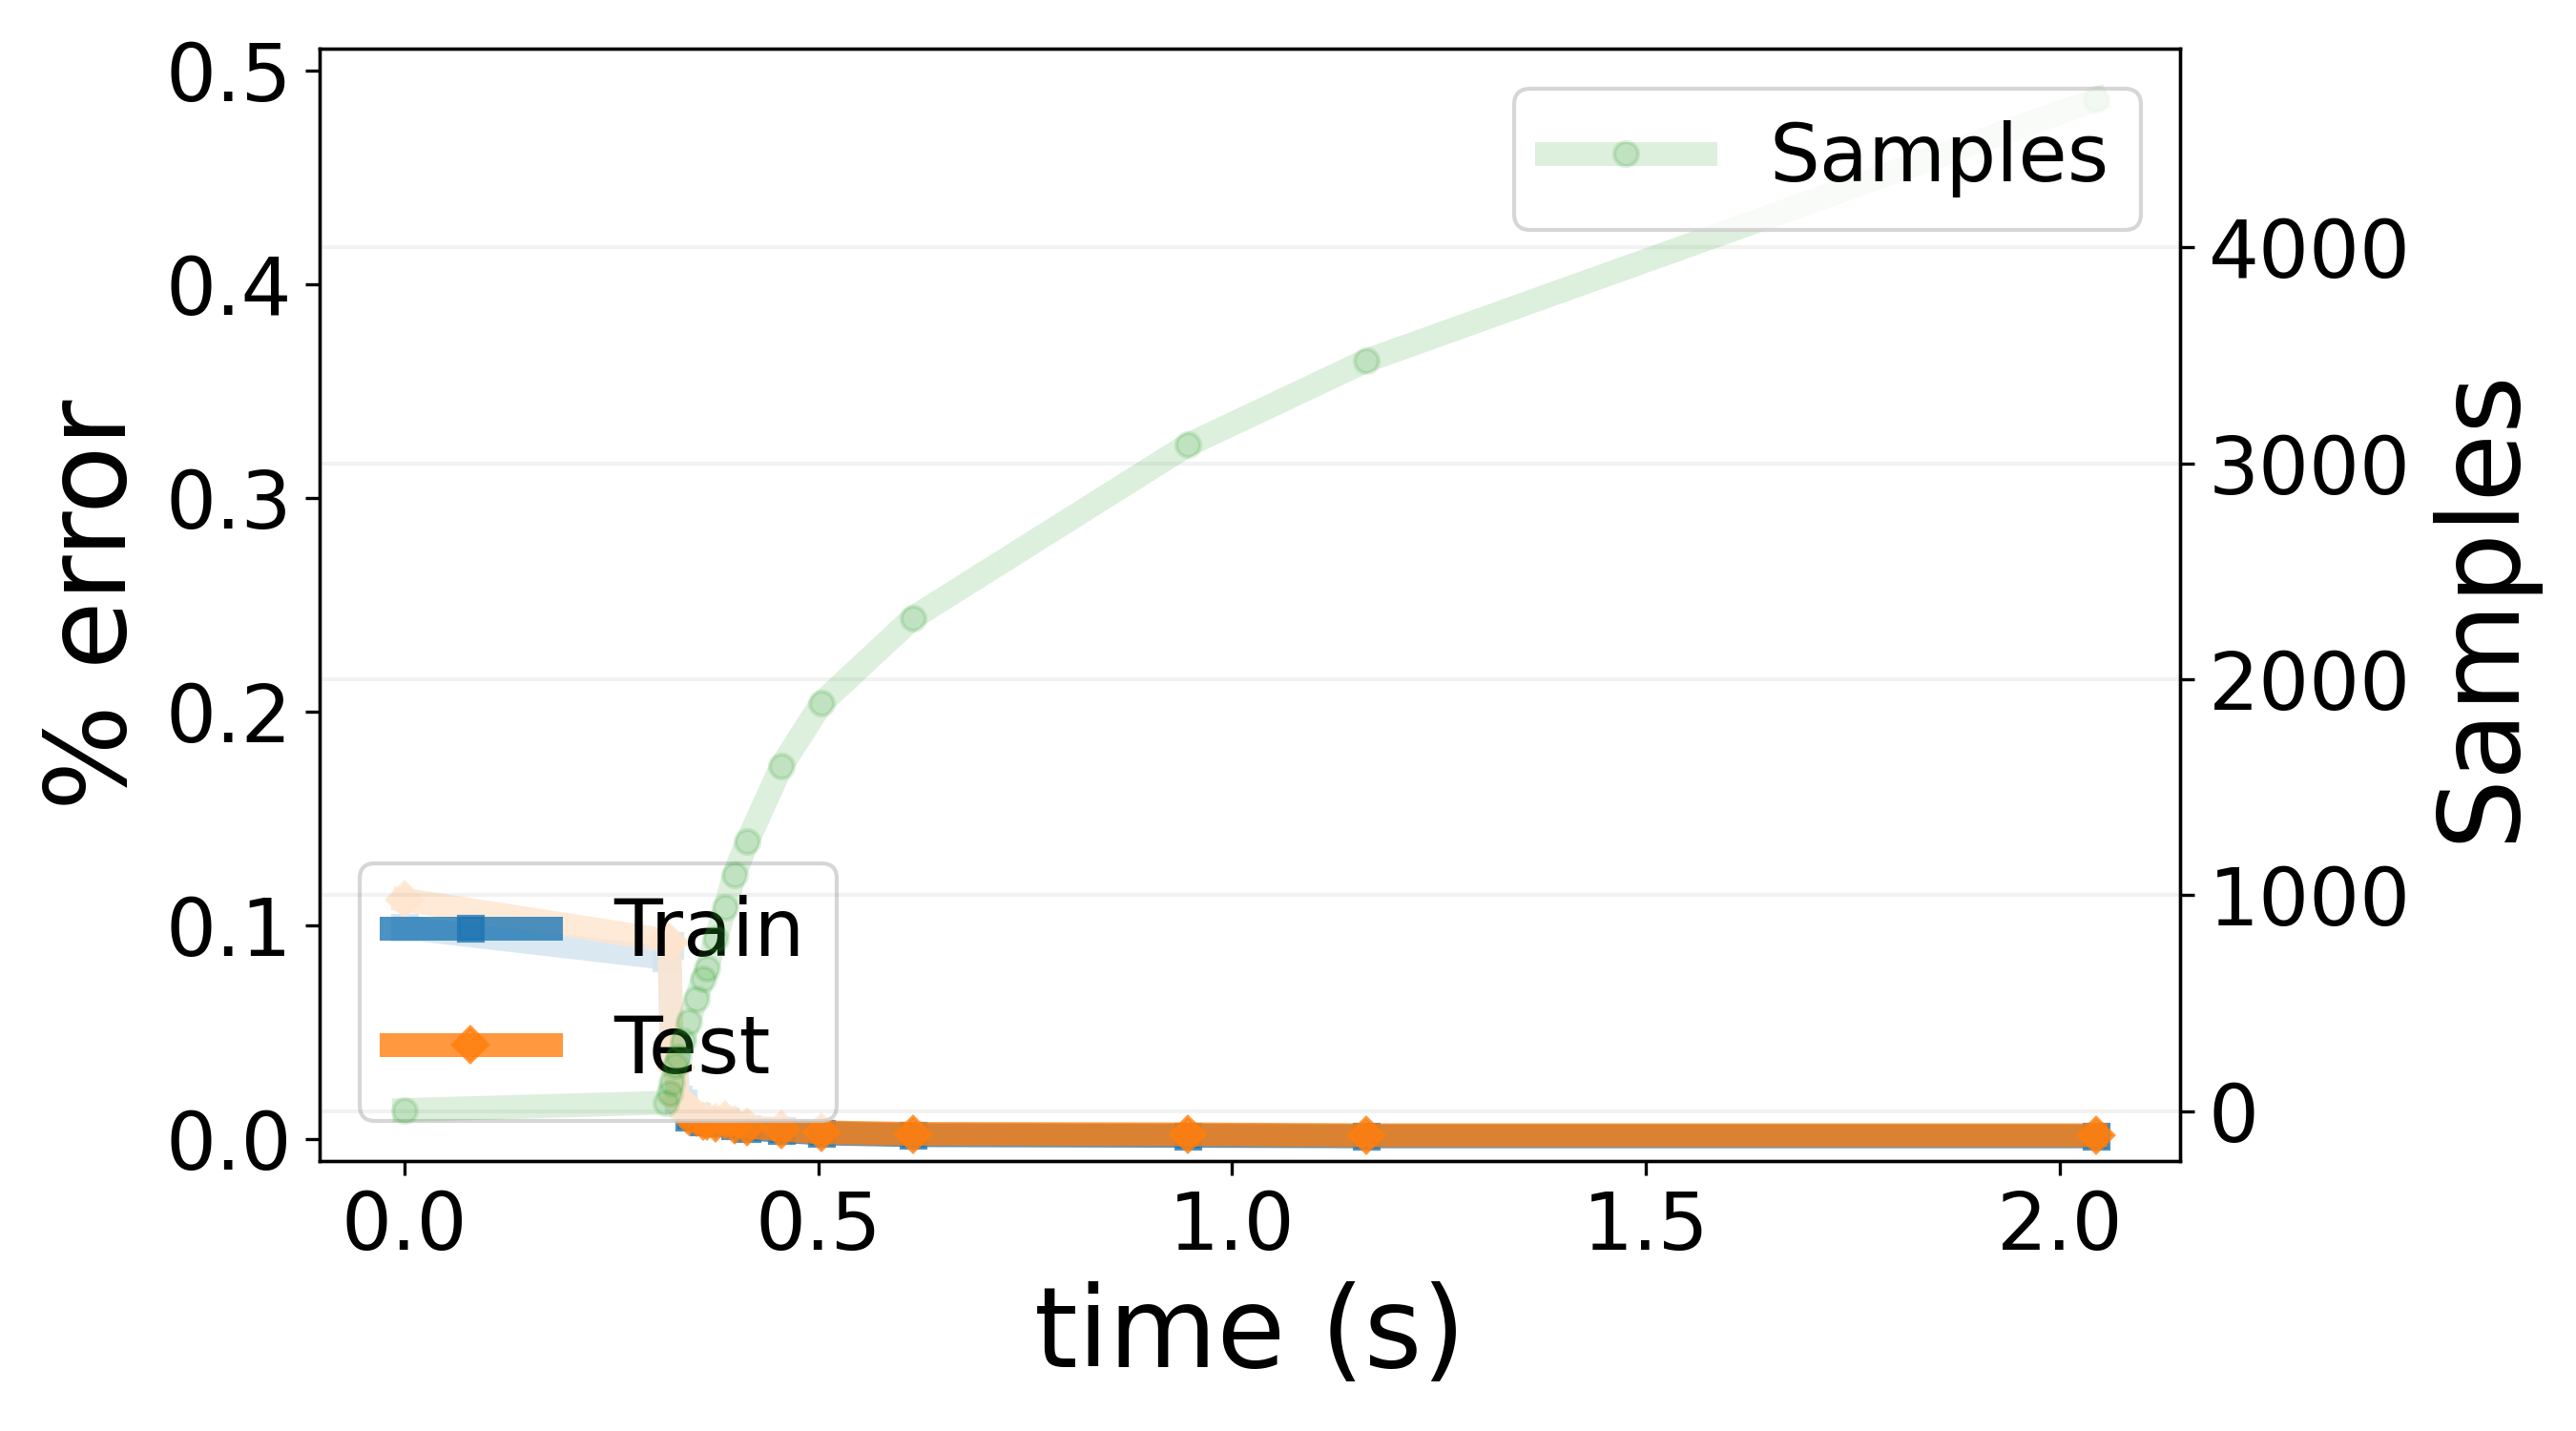

In [7]:
plot_curves = True

if plot_curves:
    oPlot = FlowLayout()
    ax = clf.plot_curve(show = False, save = False)
    oPlot.add_plot(ax)
    oPlot.PassHtmlToCell()

## Show Domain

*** Plotting Domain ***



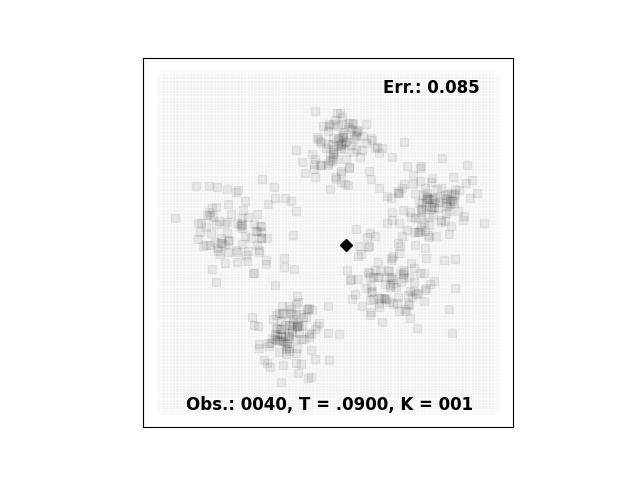
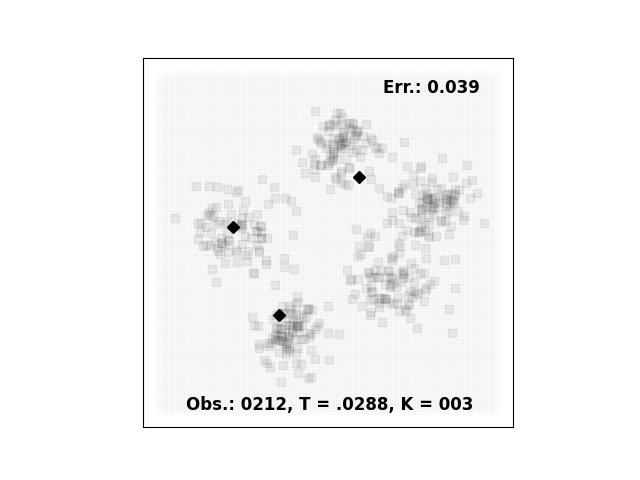
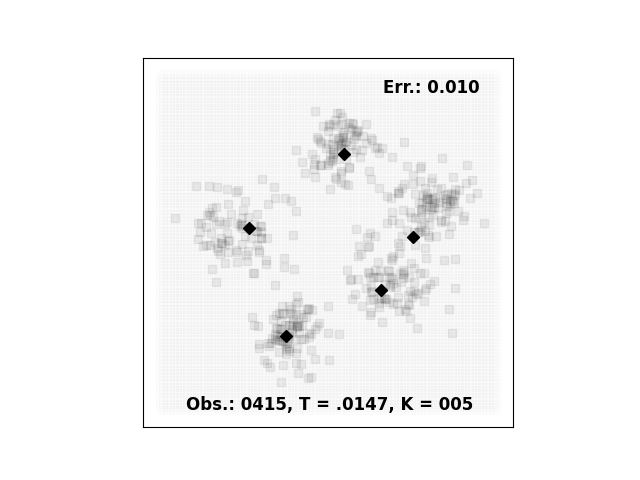
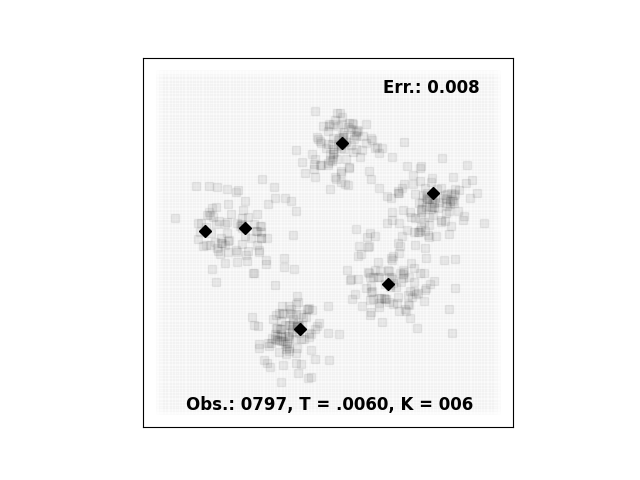

*** All Done ***


In [13]:
show_domain = True
res = [1]

if show_domain:
    print('*** Plotting Domain ***')
    if len(res)<2:
        oPlot = FlowLayout()
        for i in [2,5,8,12]:
            ax = domain_plots.show_instance(train_data=train_data,train_labels=train_labels, 
                                            clf=clf, instance = i, res=res, plot_fig=False, save_fig = False)
            oPlot.add_plot(ax)
        oPlot.PassHtmlToCell()
    else:
        axs = domain_plots.show_resolutions(train_data=train_data,train_labels=train_labels, 
                                            clf=clf, res=res, plot_fig=False, save_fig = False)
        oPlot = FlowLayout()
        for ax in axs:
            oPlot.add_plot(ax)
        oPlot.PassHtmlToCell()
        
print('*** All Done ***')

# Takeaways:

## [1] Emphasis to areas with higher probability density
- Progressively finer partition of the data space
- Consistent density estimator in the limit $K\rightarrow \infty$

## [2] Trade-off between Performance and Complexity
- No need to pre-define number of clusters $K$ (compare to k-means)
- Especially useful in communication and compression applications and embedded CPS systems

## [3] Annealing helps avoid poor local minima
- Compare to k-means, vector quantization, etc.

## [4] Online Approach
- Update representation with each observation (compare to k-means, deterministic annealing)
- Needs less observations than batch algorithms (compare to k-means, deterministic annealing)

## [5] General Dissimilarity Measures
- Beyond distance measures (compare to k-means)
- Works with any Bregman divergence (squared Euclidean distance, KL divergence, etc.)
- Can compare distributions, functions, etc.
- Can work with categorical values

## [6] Can we alleviate quadratic complexity $O(K^2)$? 
- See Tree-Structured Version below

## Advanced Parameters (Developer Mode)

### Temperature Schedule

In [ ]:
# lambda values in [0,1]. T = (1-lambda)/lambda
Tmax = [0.9]
Tmin = [1e-2]

# T' = gamma * T
gamma_steady = [0.8] 
# Initial updates can be set to reduce faster
gamma_schedule = [[0.1,0.5]]

### Bregman Divergence

In [9]:
# Bregman Divergence: Values in {'phi_Eucl', 'phi_KL'} (Squared Euclidean distance, KL divergence)
Bregman_phi = ['phi_Eucl'] 

### Tree layers & Output Distribution

In [ ]:
# Which resolution to be used in each layer of the tree. Here one layer, one resolution.
layers = [0]
# Whether to minimize wrt inpu tprobability or joint input-output probability.
observe_xy = False

### Codevector-dependent Termination 

In [ ]:
# Limit in node's children. After that stop growing
Kmax = [50]
# ODA vs Soft-Clustering vs LVQ
# 0:ODA update
# 1:ODA until Kmax. Then switch to 2:soft clustering with no perturbation/merging 
# 2:soft clustering with no perturbation/merging 
# 3: LVQ update (hard-clustering) with no perturbation/merging
lvq=[1]

### Error-dependent Termination 

In [ ]:
# Desired error type
error_type = [0] # 0:Clustering, 1:Regression, 2:Classification
# Desired training error
error_threshold = [0.0]
# Stop when reached 'error_threshold_count' times
error_threshold_count = [2]
# Limit in the number of convergent representations. (Developer Mode) 
timeline_limit = 1e3

### Regularization

In [ ]:
# Perturb (dublicate) existing codevectors 
# Parameter delta = d_phi(mu, mu+'delta')/T: 
perturb_param = [1e-1]
# Threshold to find merged (effective) codevectors
# Parameter e_n = d_phi(mu, mu+'effective_neighborhood')/T
effective_neighborhood = [1e-0]
# Parameter e_r: threshold to find idle codevectors
px_cut = [1e-6]

### Convergence Parameters

In [ ]:
# Parameter e_c =  d_phi(mu, mu+'em_convergence')/T
em_convergence = [1e-1]
# Convergece when d_phi(mu',mu) < e_c * (1+bb_init)/(1+bb) for 'convergence_counter_threshold' times
convergence_counter_threshold = [5]
# After 'stop_separation' loops, gibbs probabilities consider all codevectors regardless of class (Developer Mode)
stop_separation = [1e6-1] 
# Custom number of loops until convergence is considered true (overwrites e_c) (Developer mode)
convergence_loops = [0]
# Initial bb value for stochastic approximation stepsize: 1/(bb+1)
bb_init = [0.9]
# bb+=bb_step
bb_step = [0.9]

### Verbose

In [ ]:
# Verbose
# 0: don't show score
# 1: show score only on tree node splits 
# 2: show score after every SA convergence 
verbose = 2

### Numba Jit

In [ ]:
# Using jit/python for low-level computations
jit = True

### ODA Model Parameters

In [ ]:
'''
ODA MODEL Parameters

# Tree Structure

- self.parent
- self.children

# Status

- self.K
- self.T

- self.perturbed = False
- self.converged = False
- self.trained = False

# Variables

- self.x = []
- self.y = []
- self.labels = []
- self.parameters = []
- self.model = []
- self.optimizer = []

- self.px = []
- self.sx= []

# History

- self.myK 
- self.myT 
- self.myX 
- self.myY 
- self.myLabels 
- self.myParameters
- self.myModels
- self.myOptimizers

- self.myTrainError # list of 3 types of errors
- self.myTestError # list of 3 types of errors
- self.myLoops 
- self.myTime 
- self.myTreeK 
- self.myTreeLoops 

'''

# Tree-Structured ODA

## Data

In [15]:
# Tree Layers: Up to 3 layers
res=[1,1,1]

with open(data_file+'.pkl', mode='rb') as file:
    train_data,train_labels,test_data,test_labels = pickle.load(file)
    
# Resolutions
train_data = [[td[r] for r in res] for td in train_data]
test_data = [[td[r] for r in res] for td in test_data]

# for unsupervised learning
train_labels = [0 for i in range(len(train_labels))] 
test_labels = [0 for i in range(len(test_labels))] 

print(f'Training Data Format: [{train_data[0]}, ..., {train_data[-1]}]')

Training Data Format: [[array([0.70373002, 0.291594  ]), array([0.70373002, 0.291594  ]), array([0.70373002, 0.291594  ])], ..., [array([0.80671487, 0.61023186]), array([0.80671487, 0.61023186]), array([0.80671487, 0.61023186])]]


## Growing Criteria

In [16]:
## Stop each layer after reaching predefined error
error_threshold = [0.0]
## Stop each layer at predefined number of children
Kmax = [5, 5, 5]
## Stop each layer at predefined temperature levels
Tmax = [0.9,1e-2,1e-3]
Tmin = [1e-2,1e-3,5*1e-4]
gamma_schedule = [[0.1,0.5],[],[]]

clf = ODA(train_data=train_data,train_labels=train_labels,error_threshold=error_threshold,
         Kmax=Kmax,Tmax=Tmax,Tmin=Tmin,gamma_schedule=gamma_schedule)

print('*** Tree-Structured ODA Initialized***')
# demo_domain.data(clf=clf, res=[1], plot_fig=True,save_fig = False)

*** Tree-Structured ODA Initialized***


## Comments on Growing/Splitting Criteria

> These are predefined termination criteria.

> Most of them do not require feedback (error calculation with respect to some dataset).

> This is reminiscent of genetic algorithms.

> Adaptive termination criteria with respect to feedback (e.g., relative change to error) can also be implemented.

> For an application-specific extension please contact the author.

## Fit Tree-Structured ODA

In [17]:
print('*** ODA ***')

clf.fit(test_data=test_data,test_labels=test_labels)

print('*** ODA ***')
accuTrain = clf.score(train_data, train_labels)
accuTest = clf.score(test_data, test_labels)
print(f'Ave. Distortion: {accuTrain}') 
print(f'Ave. Distortion: {accuTest}')    
print(f'Running time: {np.sum(clf.myTime):.1f}s')

*** ODA ***
2 -- ID: [0]: Samples: 6(+6): T = 0.9000, K = 1, treeK = 1, [+0.0s]
Train Error: 0.1094
Test Error: 0.1199
3 -- ID: [0]: Samples: 40(+34): T = 0.0900, K = 1, treeK = 1, [+0.0s]
Train Error: 0.0850
Test Error: 0.0938
4 -- ID: [0]: Samples: 81(+41): T = 0.0450, K = 1, treeK = 1, [+0.0s]
Train Error: 0.0990
Test Error: 0.0977
5 -- ID: [0]: Samples: 130(+49): T = 0.0360, K = 2, treeK = 2, [+0.0s]
Train Error: 0.0430
Test Error: 0.0457
6 -- ID: [0]: Samples: 209(+79): T = 0.0288, K = 3, treeK = 3, [+0.0s]
Train Error: 0.0362
Test Error: 0.0315
7 -- ID: [0]: Samples: 294(+85): T = 0.0230, K = 3, treeK = 3, [+0.0s]
Train Error: 0.0306
Test Error: 0.0287
8 -- ID: [0]: Samples: 374(+80): T = 0.0184, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0100
Test Error: 0.0104
9 -- ID: [0]: Samples: 464(+90): T = 0.0147, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0085
Test Error: 0.0086
10 -- ID: [0]: Samples: 560(+96): T = 0.0118, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0081
Test Error: 0.0082
11

71 -- ID: [0, 0, 0]: Samples: 66(+37): T = 0.0008, K = 3, treeK = 30, [+0.1s]
Train Error: 0.0023
Test Error: 0.0028
72 -- ID: [0, 2, 2]: Samples: 38(+38): T = 0.0010, K = 2, treeK = 31, [+0.2s]
Train Error: 0.0023
Test Error: 0.0028
73 -- ID: [0, 3, 1]: Samples: 41(+41): T = 0.0010, K = 2, treeK = 32, [+0.4s]
Train Error: 0.0023
Test Error: 0.0027
74 -- ID: [0, 0, 2]: Samples: 42(+42): T = 0.0010, K = 2, treeK = 33, [+0.3s]
Train Error: 0.0023
Test Error: 0.0027
75 -- ID: [0, 3, 0]: Samples: 140(+71): T = 0.0006, K = 3, treeK = 34, [+0.2s]
Train Error: 0.0022
Test Error: 0.0027
76 -- ID: [0, 2, 0]: Samples: 52(+52): T = 0.0010, K = 2, treeK = 35, [+0.3s]
Train Error: 0.0021
Test Error: 0.0026
77 -- ID: [0, 3, 2]: Samples: 138(+44): T = 0.0005, K = 3, treeK = 36, [+0.1s]
Train Error: 0.0021
Test Error: 0.0026
78 -- ID: [0, 1, 2]: Samples: 64(+38): T = 0.0008, K = 3, treeK = 37, [+0.2s]
Train Error: 0.0020
Test Error: 0.0025
79 -- ID: [0, 4]: Samples: 706(+176): T = 0.0011, K = 5, treeK

135 -- ID: [0, 2, 2]: Samples: 261(+80): T = 0.0006, K = 4, treeK = 78, [+0.4s]
--- Maximum number of codevectors reached. 
ID: [0, 2, 2]: Trained
136 -- ID: [0, 4, 3]: Samples: 180(+52): T = 0.0005, K = 3, treeK = 79, [+0.3s]
Train Error: 0.0007
Test Error: 0.0012
137 -- ID: [0, 1, 2]: Samples: 330(+128): T = 0.0004, K = 5, treeK = 80, [+0.6s]
Train Error: 0.0007
Test Error: 0.0012
--- Minimum temperature reached. ---
ID: [0, 1, 2]: Trained
138 -- ID: [0, 1, 3]: Samples: 427(+127): T = 0.0005, K = 5, treeK = 80, [+0.4s]
--- Maximum number of codevectors reached. 
ID: [0, 1, 3]: Trained
139 -- ID: [0, 0, 2]: Samples: 304(+105): T = 0.0005, K = 4, treeK = 80, [+0.5s]
--- Maximum number of codevectors reached. 
ID: [0, 0, 2]: Trained
*** Idle Codevector Pruned ***
140 -- ID: [0, 4, 4]: Samples: 109(+29): T = 0.0005, K = 3, treeK = 80, [+0.3s]
Train Error: 0.0007
Test Error: 0.0012
141 -- ID: [0, 2, 3]: Samples: 280(+73): T = 0.0005, K = 5, treeK = 80, [+0.3s]
Train Error: 0.0007
Test Err

## Plot Training Curve


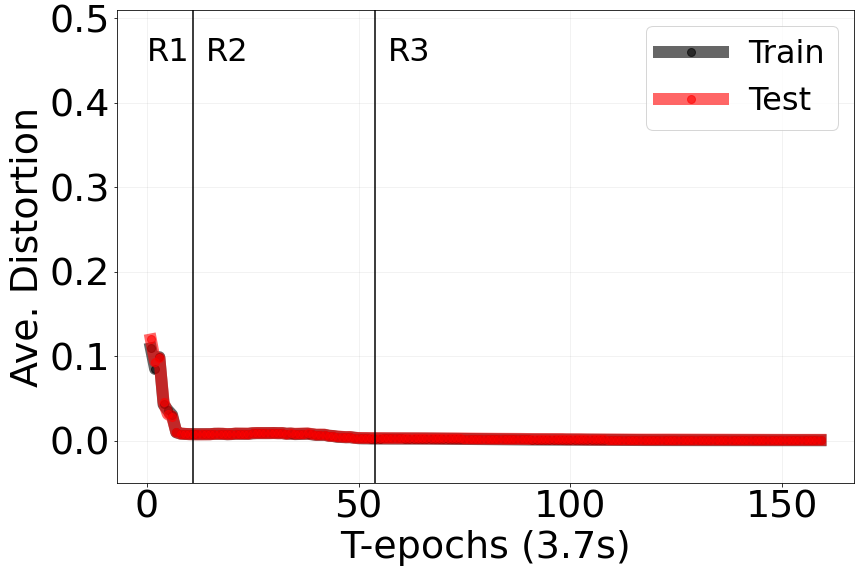

In [18]:
if clf.keepscore>1 and plot_curves:
    oPlot = FlowLayout()
    ax = clf.plot_curve('.', show = False, save = False)
    oPlot.add_plot(ax)
    oPlot.PassHtmlToCell()

## Show Domain

*** Plotting Domain ***



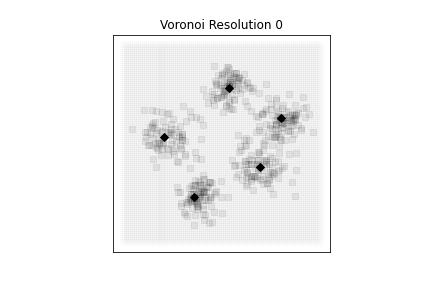
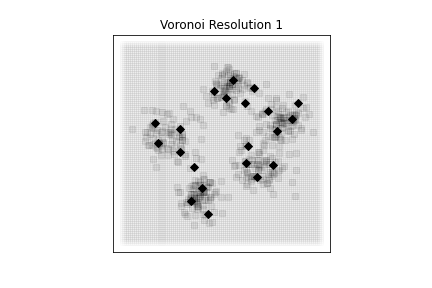
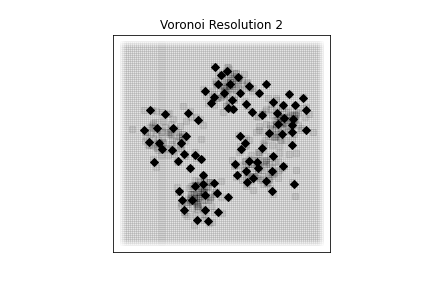

*** All Done ***


In [ ]:
show_domain = True

if show_domain:
    print('*** Plotting Domain ***')
    if len(res)<2:
        oPlot = FlowLayout()
        for i in [1,3,7]:
            ax = domain_plots.show_instance(clf=clf, instance = i, res=res, plot_fig=False, save_fig = False)
            oPlot.add_plot(ax)
        oPlot.PassHtmlToCell()
    else:
        axs = domain_plots.show_resolutions(clf=clf, res=res, plot_fig=False, save_fig = False)
        oPlot = FlowLayout()
        for ax in axs:
            oPlot.add_plot(ax)
        oPlot.PassHtmlToCell()
        
print('*** All Done ***')

# Takeaways:

## [1] Reduction in time complexity $O(|C|^2 + |C| \log_{|C|} K) < O(K^2)$
- $|C|<<K$: number of children nodes 
- typically $|C|>2$, which implies $\log_{|C|} K<\log_{2} K$ ($|C|=2$ in binary trees)
- Compare 3.6s (Tree-Structured ODA) to ~30s (ODA)

## [2] Hierarchical Partitioning 
- Reduces prediction time to $O(|C| \log_{|C|} K) < O(K^2)$
- Creates hierarchically structured knowledge representation useful in attention mechanisms, progressive compression, etc.